In [1]:
from sklearn.datasets import make_moons

In [2]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import roc_curve

In [4]:
data,target = make_moons(n_samples=400)

In [5]:
data.shape

(400, 2)

In [6]:
target.shape

(400,)

In [62]:
logistic_1 = LogisticRegression()
logistic_1.fit(data,target)

logistic_2 = LogisticRegression(penalty='l1',C=0.1, solver='liblinear')
logistic_2.fit(data,target)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
prediction_1 = logistic_1.predict_proba(data)
prediction_2 = logistic_2.predict_proba(data)

In [64]:
prediction[:4]

array([[0.48462246, 0.51537754],
       [0.87965333, 0.12034667],
       [0.02376638, 0.97623362],
       [0.18746155, 0.81253845]])

In [65]:
fpr1, tpr1, threshold1 = roc_curve(target, prediction_1[:,1])
fpr2, tpr2, threshold2 = roc_curve(target, prediction_2[:,1])

In [66]:
from sklearn.metrics import roc_auc_score

In [67]:
auc_score = roc_auc_score(target, prediction_1[:,1])

In [68]:
auc_score

0.9644750000000001

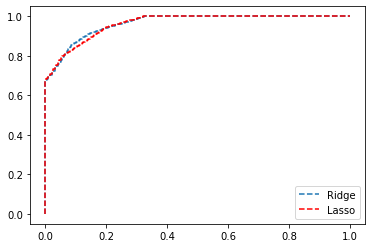

In [69]:
plt.plot(fpr1, tpr1, label='Ridge', linestyle='--')
plt.plot(fpr2, tpr2, label='Lasso', color='red', linestyle='--')
plt.legend()
plt.plot()
plt.show()